In [1]:
import tensorflow as tf
from keras import layers,datasets,Sequential
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

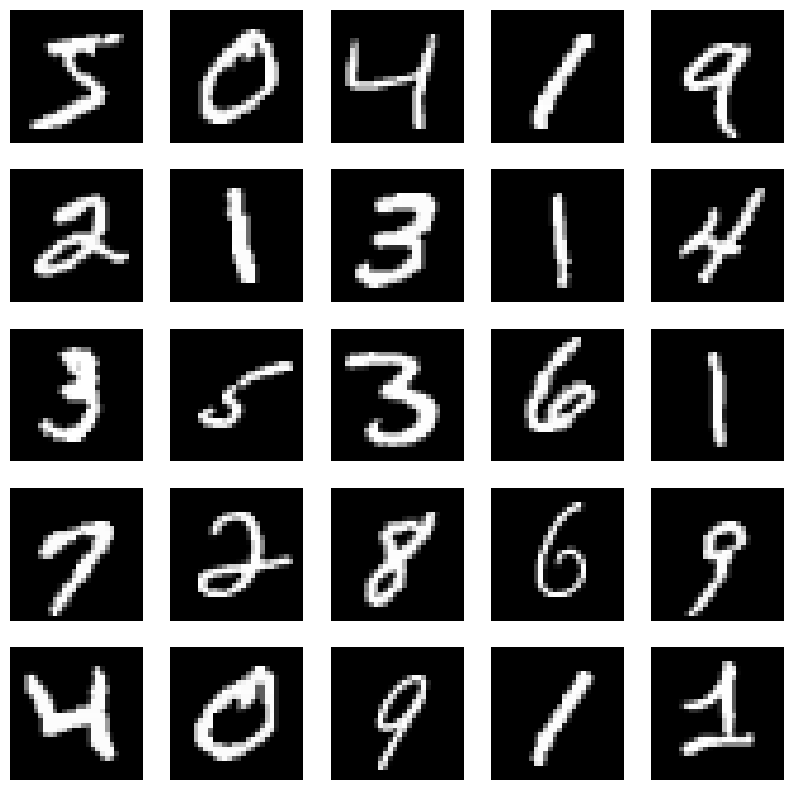

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
x_train=x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test=x_test.reshape(-1,28,28,1).astype('float32')/255.0
model=Sequential(
    [
        layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(128,activation='softmax'),
    ]
)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.5492 - loss: 1.3028 - val_accuracy: 0.8968 - val_loss: 0.3483
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9089 - loss: 0.3061 - val_accuracy: 0.9317 - val_loss: 0.2338
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9409 - loss: 0.2014 - val_accuracy: 0.9521 - val_loss: 0.1622
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9587 - loss: 0.1398 - val_accuracy: 0.9720 - val_loss: 0.0988
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9668 - loss: 0.1108 - val_accuracy: 0.9742 - val_loss: 0.0840
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9716 - loss: 0.0934 - val_accuracy: 0.9752 - val_loss: 0.0822
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9750 - loss: 0.0829 - val_accuracy: 0.9760 - val_loss: 0.0709
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9772 - l